In [1]:
import qcdenoise
import matplotlib.pyplot as plt

#### Load the default graph state database

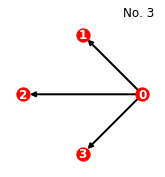

In [2]:
graph_db = qcdenoise.GraphDB()
graph_db.plot_graph(graph_number=[3])

#### Initiate a q-circuit builder from graph states

In [3]:
circ_builder = qcdenoise.GraphCircuit(graph_db=graph_db, n_qubits=9, 
                                      verbose=True, state_simulation=False)

Configuration with 2 Subgraphs with # nodes:(4, 5)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges


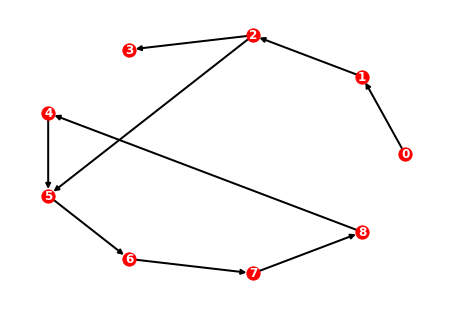

In [4]:
circ_builder.build_circuit(graph_plot=True)

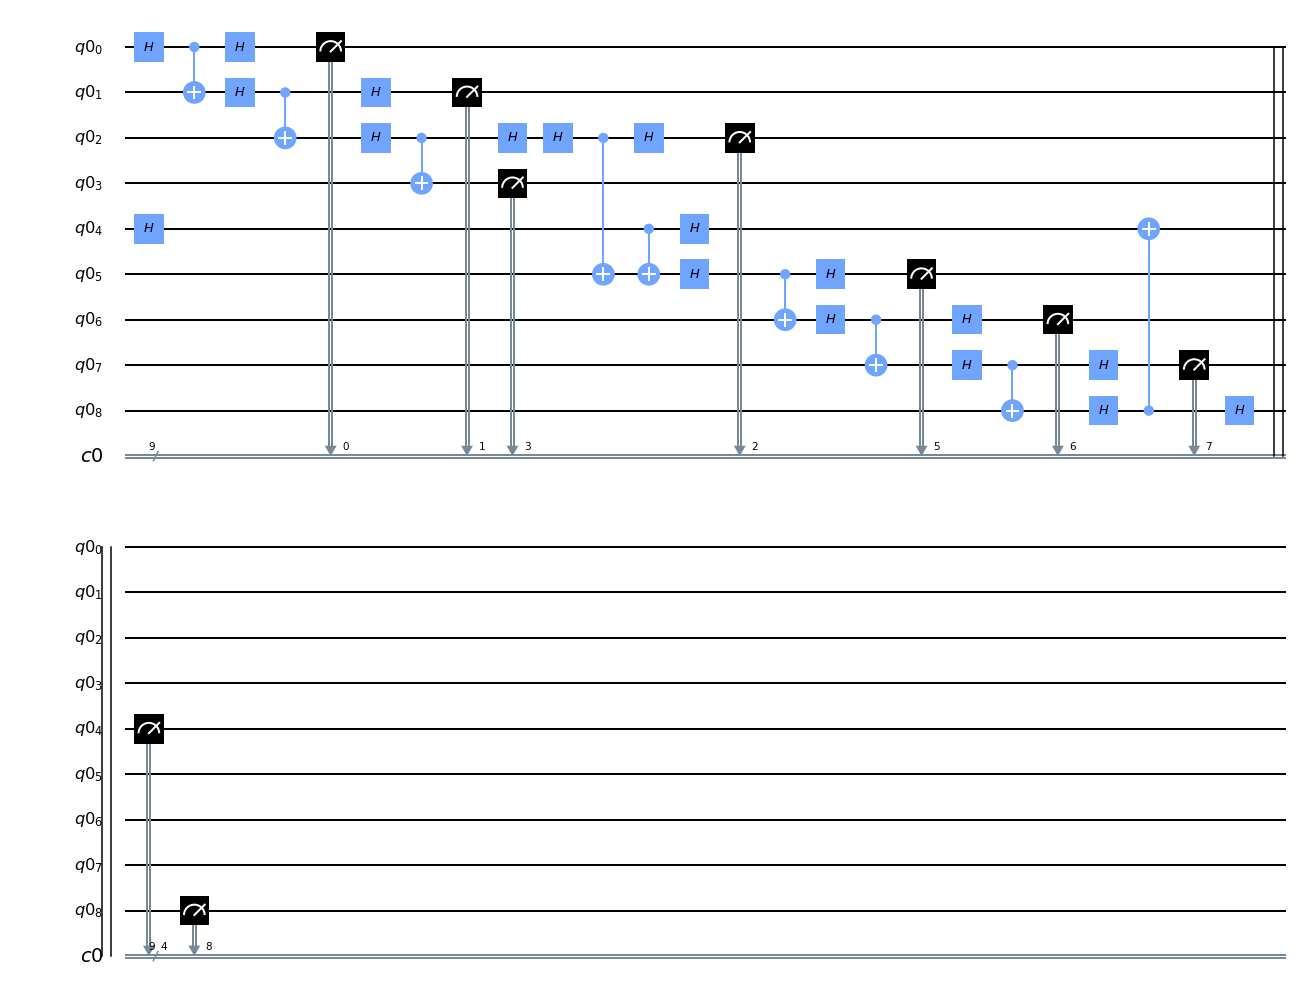

In [5]:
circ_builder.circuit.draw(output="mpl")

#### Build 10 q-circuits from random combinations of graph states subgraphs
Below is how one would interact with the `qcdenoise.CircuitConstructor` from a `qcdenoise.CircuitSampler` class.

In [6]:
circuits = []
for i in range(10):
    print("Circuit %s:" %i)
    circ_builder.build_circuit(graph_plot=False)
    circuits.append(circ_builder.circuit)

Circuit 0:
Configuration with 2 Subgraphs with # nodes:(3, 6)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 1:
Configuration with 3 Subgraphs with # nodes:(2, 2, 5)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 2:
Configuration with 2 Subgraphs with # nodes:(4, 5)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 3:
Configuration with 3 Subgraphs with # nodes:(2, 2, 5)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 4:
Configuration with 4 Subgraphs with # nodes:(2, 2, 2, 3)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 5:
Configuration with 4 Subgraphs with # nodes:(2, 2, 2, 3)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 6:
Configuration with 2 Subgraphs with # nodes:(4, 5)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 7:
Configuration with 4 Subgraphs with # nodes:(2, 2, 2, 3)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 